In [33]:
# all the imports
!pip install yfinance
import yfinance as yf


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [97]:
# ticker_sp500 = '^GSPC'
tickers = ["AMZN", "MSFT", "AAPL", "NVDA", "^GSPC"]
start_date = '1999-06-01'
end_date = '2020-03-31'
# end_date = '2024-03-31'

In [98]:
stockDataSP500 = yf.download(ticker_sp500, start=start_date, end=end_date, prepost=True)

[*********************100%%**********************]  1 of 1 completed


In [99]:
print(stockDataSP500)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1999-06-01  1301.839966  1301.839966  1281.439941  1294.260010  1294.260010   
1999-06-02  1294.260010  1297.099976  1277.469971  1294.810059  1294.810059   
1999-06-03  1294.810059  1304.150024  1294.199951  1299.540039  1299.540039   
1999-06-04  1299.540039  1327.750000  1299.540039  1327.750000  1327.750000   
1999-06-07  1327.750000  1336.420044  1325.890015  1334.520020  1334.520020   
...                 ...          ...          ...          ...          ...   
2020-03-24  2344.439941  2449.709961  2344.439941  2447.330078  2447.330078   
2020-03-25  2457.770020  2571.419922  2407.530029  2475.560059  2475.560059   
2020-03-26  2501.290039  2637.010010  2500.719971  2630.070068  2630.070068   
2020-03-27  2555.870117  2615.909912  2520.020020  2541.469971  2541.469971   
2020-03-30  2558.979980  2631.800049  2545.280029  2

In [100]:
stockData = [yf.download(ticker, start=start_date, end=end_date, prepost=True) for ticker in tickers]

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [101]:
print(stockData)

[                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
1999-06-01   2.787500   2.837500   2.624609   2.645313   2.645313  401528000
1999-06-02   2.618750   2.875000   2.428125   2.803125   2.803125  738128000
1999-06-03   2.848438   2.862500   2.612500   2.626563   2.626563  346232000
1999-06-04   2.640625   2.750000   2.540625   2.710938   2.710938  389836000
1999-06-07   2.714063   2.996875   2.700000   2.934375   2.934375  338028000
...               ...        ...        ...        ...        ...        ...
2020-03-24  97.574997  97.750000  95.016998  97.004997  97.004997  142942000
2020-03-25  96.034500  97.513000  94.289001  94.292000  94.292000  129582000
2020-03-26  95.099998  97.824501  94.464500  97.774498  97.774498  124426000
2020-03-27  96.542999  96.989502  94.996002  95.004997  95.004997  107758000
2020-03-30  96.141502  98.681503  95.616997  98.197502  98.197502  12252200

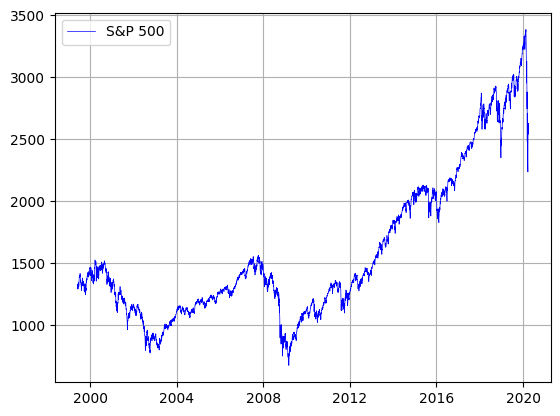

In [102]:
# plotting
import matplotlib.pyplot as plt
plt.plot(stockDataSP500['Close'], color='blue', linewidth=0.5)
plt.legend(['S&P 500'])
plt.grid()
plt.show()

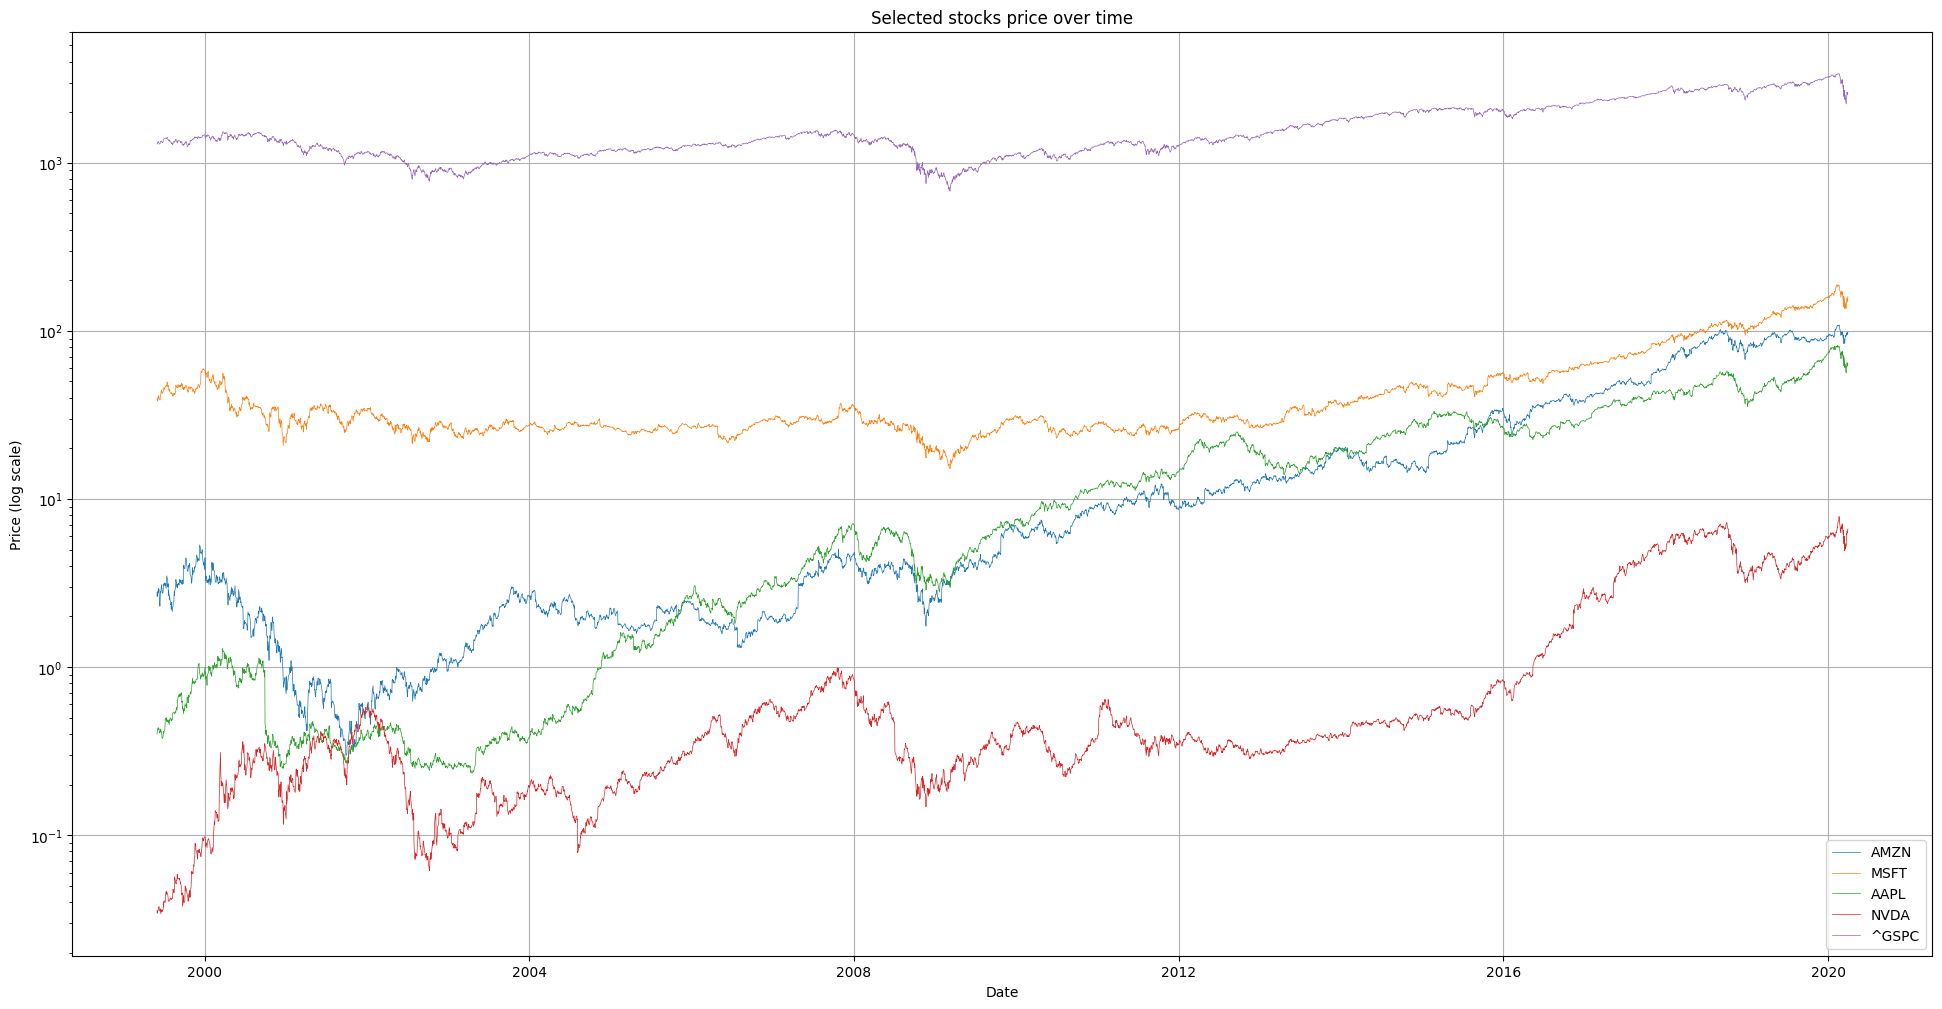

In [103]:
# plott all the stocks


import matplotlib.pyplot as plt

# colors = plt.cm.viridis(range(len(tickers)))

plt.figure(figsize=(24, 12))
# plt.plot(stockDataSP500['Close'], linewidth=1, color='black')
for i, stock in enumerate(stockData):
    plt.plot(stock['Close'], linewidth=0.5)
plt.legend(tickers)
plt.yscale('log')
plt.ylabel('Price (log scale)')
plt.xlabel('Date')
plt.title('Selected stocks price over time')
plt.grid()
plt.show()

In [104]:
# calcula daily price change for
def calculate_daily_returns(df):
    return df.pct_change(1)

# calculate daily cumulative returns
def calculate_daily_cumulative_returns(df):
    return (1 + df).cumprod()


In [105]:
stockd_returnSP500 = calculate_daily_returns(stockDataSP500)
stocks_return = [calculate_daily_returns(stock) for stock in stockData]


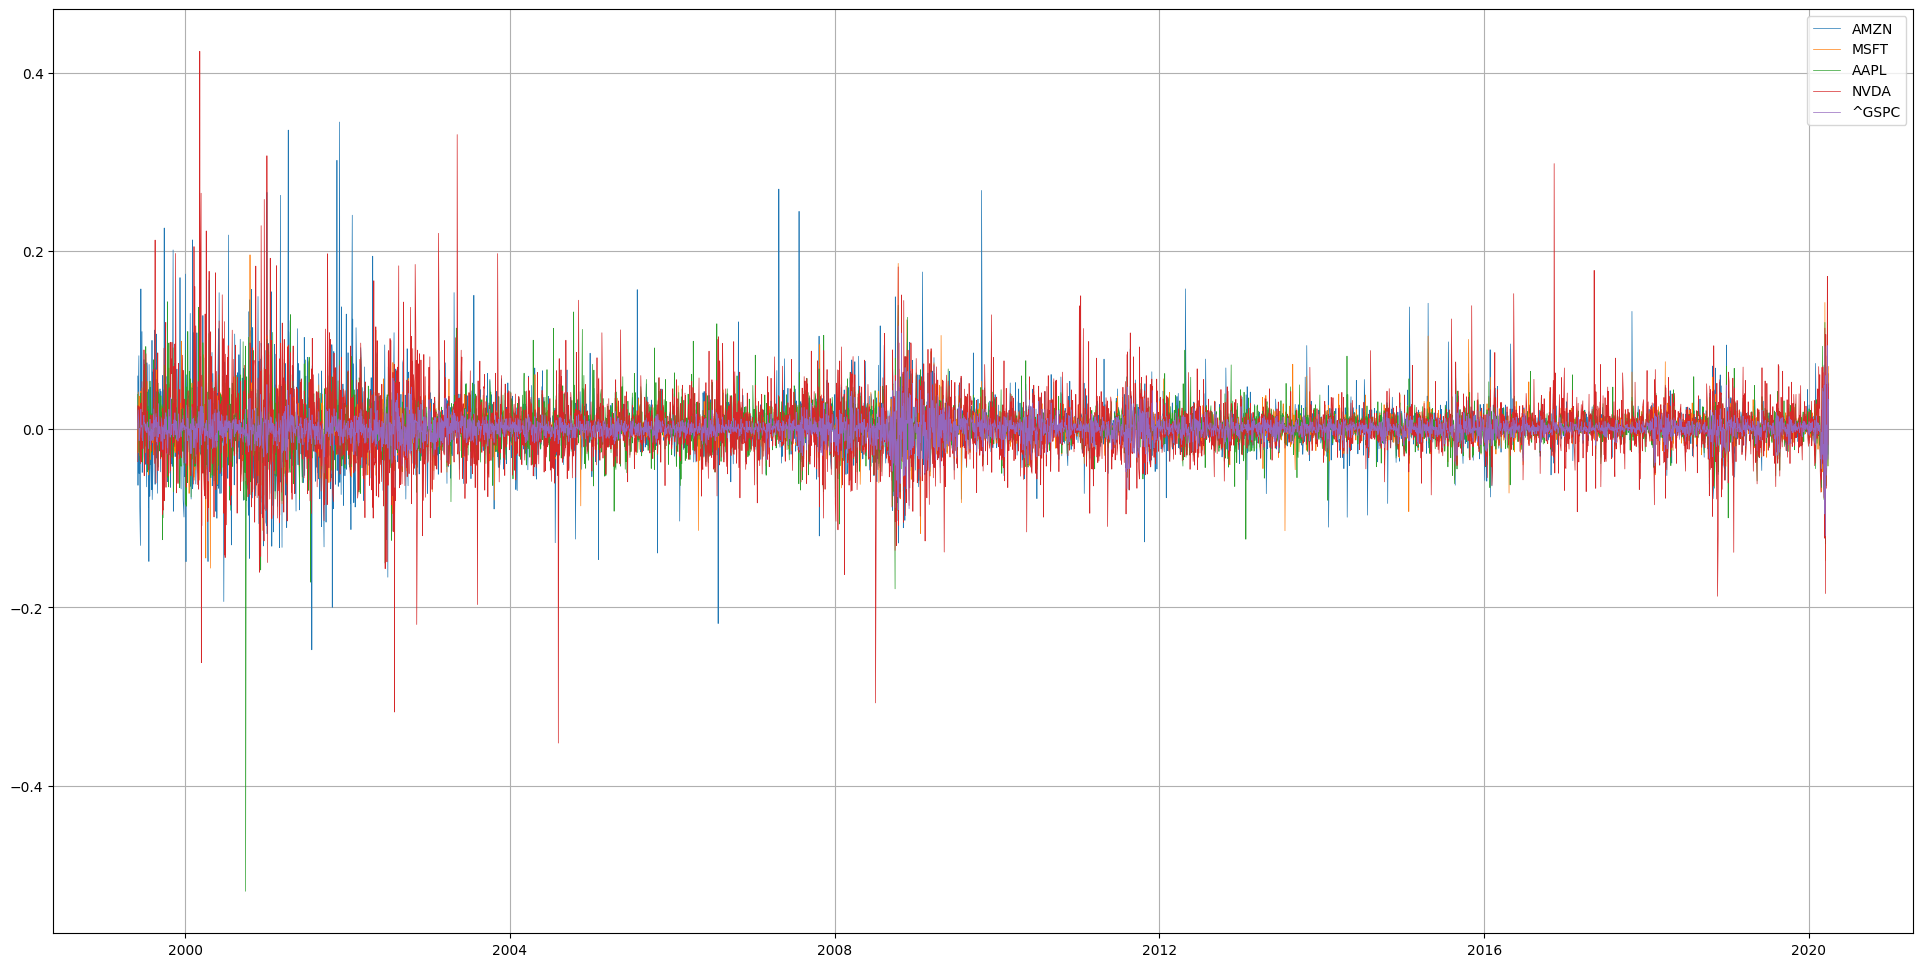

In [106]:
# plott all the stocks

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
for i, stock in enumerate(stocks_return):
    plt.plot(stock['Close'], linewidth=0.5)
plt.legend(tickers)
plt.grid()
plt.show()

In [107]:
# filter out the datafram to only contain one entry per month

# convert index to datetime 
# sp500 to stock data

stockData_monthly = [stock.resample('M').first() for stock in stockData]

# stockDataSP500_monthly = stockDataSP500_monthly.reset_index()
# stockDataSP500_monthly = stockDataSP500_monthly.set_index('Date'

# stockDataSP500_monthly = stockDataSP500_monthly.sort_values(by='Date')


In [109]:
# claculate mean and std of stocks
stocks_returns_monthly = [calculate_daily_returns(stock) for stock in stockData_monthly]

stocks_mean = [np.mean(stock['Close']) for stock in stocks_returns_monthly]
stocks_std = [np.std(stock['Close']) for stock in stocks_returns_monthly]

In [110]:
print(stockDataSP500)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1999-06-01  1301.839966  1301.839966  1281.439941  1294.260010  1294.260010   
1999-06-02  1294.260010  1297.099976  1277.469971  1294.810059  1294.810059   
1999-06-03  1294.810059  1304.150024  1294.199951  1299.540039  1299.540039   
1999-06-04  1299.540039  1327.750000  1299.540039  1327.750000  1327.750000   
1999-06-07  1327.750000  1336.420044  1325.890015  1334.520020  1334.520020   
...                 ...          ...          ...          ...          ...   
2020-03-24  2344.439941  2449.709961  2344.439941  2447.330078  2447.330078   
2020-03-25  2457.770020  2571.419922  2407.530029  2475.560059  2475.560059   
2020-03-26  2501.290039  2637.010010  2500.719971  2630.070068  2630.070068   
2020-03-27  2555.870117  2615.909912  2520.020020  2541.469971  2541.469971   
2020-03-30  2558.979980  2631.800049  2545.280029  2

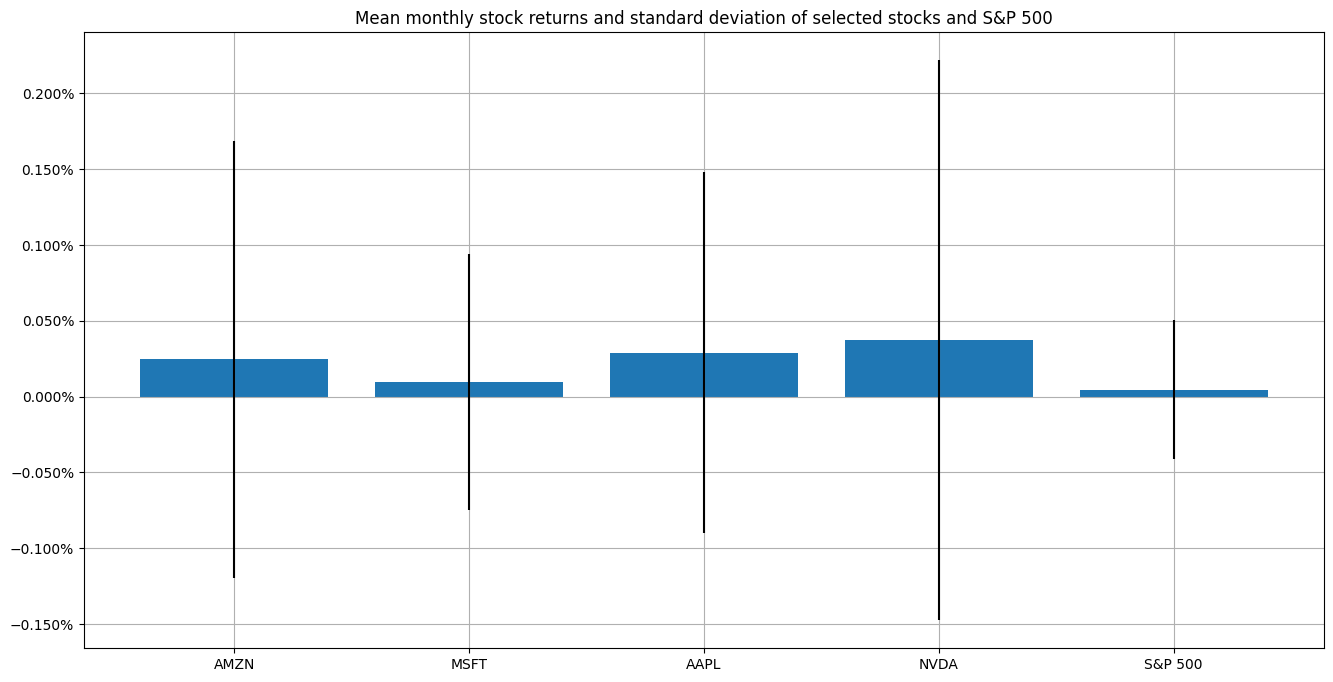

In [117]:
# plot all as bars with error bars
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.figure(figsize=(16, 8))
plt.bar(tickers[:-1] + ['S&P 500'], stocks_mean, yerr=stocks_std, linewidth=0.5)
# plt.yticks(np.arange(-.05, .05, 0.002))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# make the scale display percents
plt.title('Mean monthly stock returns and standard deviation of selected stocks and S&P 500')
plt.grid()
plt.show()

In [27]:
stockd_cum_returnSP500 = calculate_daily_cumulative_returns(stockDataSP500)
stocks_cum_return = [calculate_daily_cumulative_returns(stock) for stock in stocks_return]

/home/killshot/Programmings/Python/Project Lapis/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


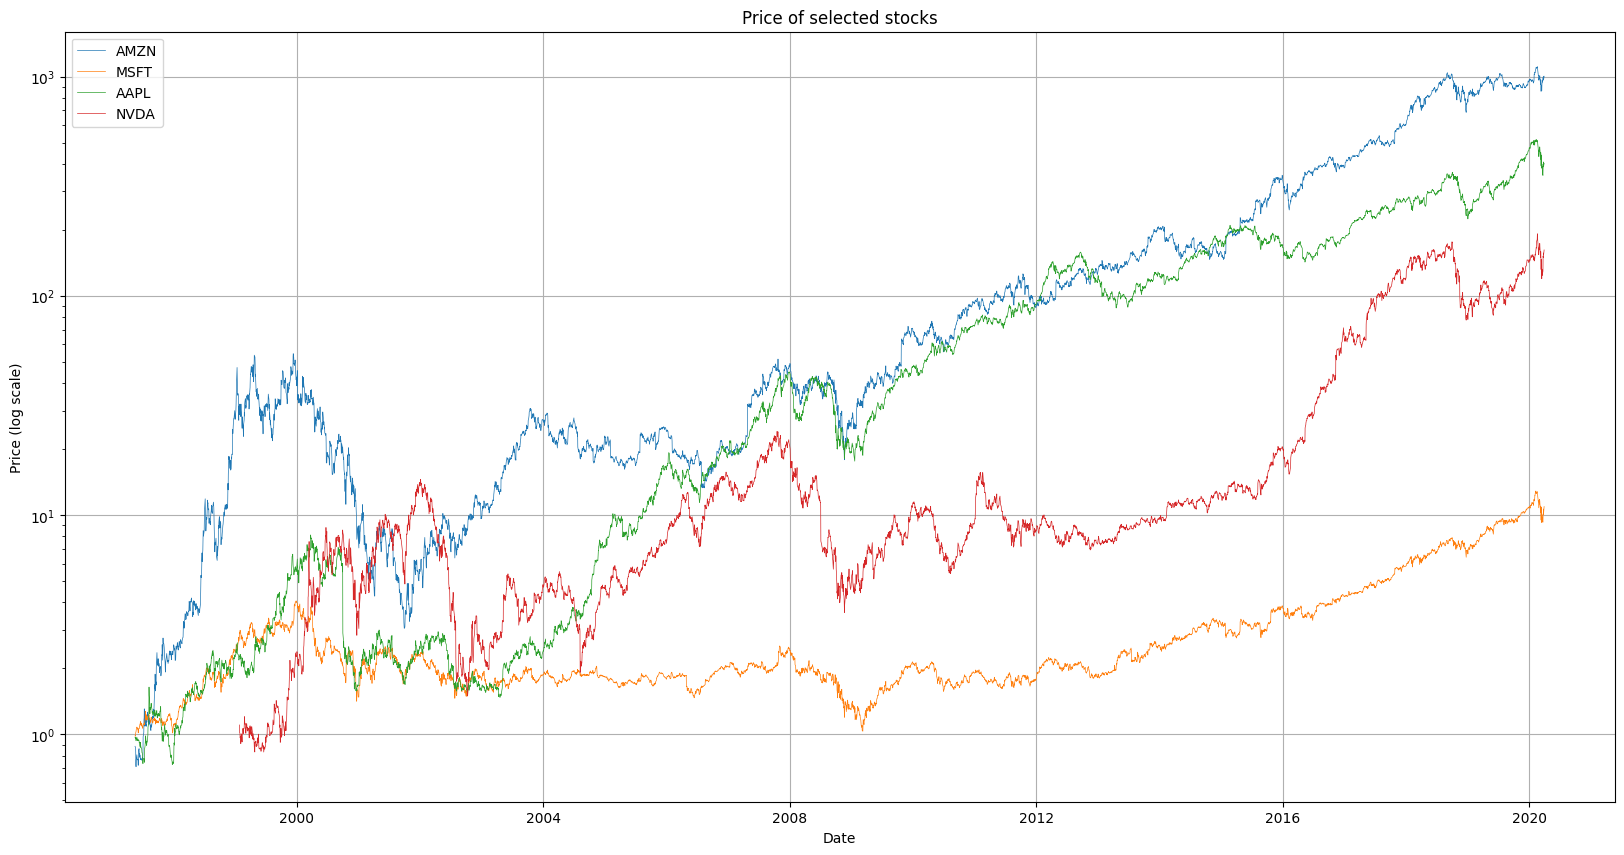

In [31]:
# plot all cum returns

plt.figure(figsize=(20, 10))
# plt.plot(stockd_cum_returnSP500, linewidth=1, color='black')
for i, stock in enumerate(stocks_cum_return):
    plt.plot(stock['Close'], linewidth=0.5)
plt.legend(tickers + ['S&P 500'])
plt.yscale('log')
plt.title('Price of selected stocks')
plt.xlabel('Date')
plt.ylabel('Price (log scale)')
plt.grid()
plt.show()